<a href="https://colab.research.google.com/github/CalebAnderson22/PHY122/blob/main/L5_Anderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 5

Caleb Anderson

23 November 2024

#   <font color='Green'> **Setup** </font>

In [1965]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from numpy.random import normal as random_normal
from numpy import arange, sort, searchsorted, exp, sqrt, zeros, ones, array, sin, cos
from numpy import sum as Σ
import textwrap

np.set_printoptions(precision=4, linewidth=200, threshold=2000, suppress=True)

π = np.pi

def d(X):
    return np.gradient(X, axis=0)

def VelocityVerletRot(T, x0=np.array([1.,0.,0.]), v0=np.zeros(3), mass=1., xcenter=np.zeros(3)):
    Δt = T[1] - T[0]

    x_t = np.zeros((len(T),3))
    v_t = np.zeros((len(T),3))
    f_t = np.zeros((len(T),3))

    x_t[0] = x0
    v_t[0] = v0
    f_t[0] = -np.dot( v_t[0], v_t[0]) / (np.linalg.norm(x_t[0])**2) * ( x_t[0] - xcenter )
    a_told = np.zeros(3)
    for t in range(len(T)-1):
        x_t[t+1] = x_t[t] + v_t[t] * Δt + 0.5 * a_told * (Δt*Δt)

        a_tnew = -np.dot( v_t[t], v_t[t]) / (np.linalg.norm(x_t[t])**2) * ( x_t[t] - xcenter )
        f_t[t+1] = mass* a_tnew

        v_t[t+1]  = v_t[t] + 0.5 * (a_told + a_tnew) * Δt
        a_told    = a_tnew

    return x_t, v_t, f_t

## <font color='Green'> **example** </font>

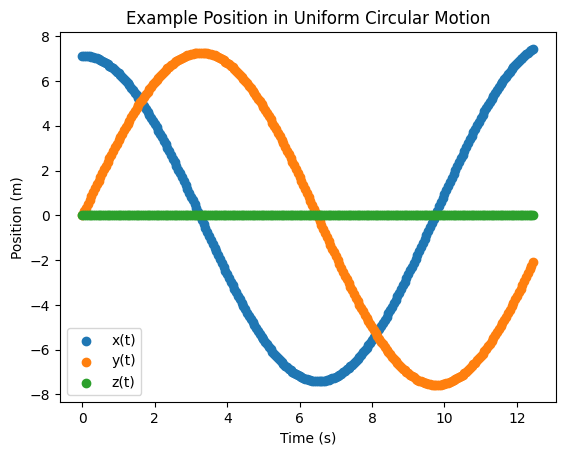

In [1966]:
t  = arange(0, 12.5, 0.05) ## time-array (collection of all time-points measured by detector)
x0 = array([7.1234,0.,0.]) ## start solely on the 0-axis
v0 = array([0.,3.4567,0.]) ## initial-velocity (needed for rotational motion) on 1-axis

x_t, v_t, f_t = VelocityVerletRot(t, x0=x0, v0=v0) ## using my method for rotational-motion (defined above)

plt.title("Example Position in Uniform Circular Motion")
plt.scatter(t, x_t[:,0], label = "x(t)") ## 0-axis plot
plt.scatter(t, x_t[:,1], label = "y(t)") ## 1-axis plot
plt.scatter(t, x_t[:,2], label = "z(t)") ## 2-axis plot
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend(loc="best")
plt.show()

The motion of this particle is completely within the x-y plane. It therefore never moves from its initial z-position of 0 m. Given the circularity of its path, displacement in the x- and y-directions oscillate sinusoidally with time, returning periodically to their initial position at (7.1234, 0, 0) m. As the particel moves around the circle, x- and y-displacements are necessarily offset by a 90 degree phase shift.

#   <font color='Red'> **Experiment 1** </font>

### <font color='Red'>  Let's get acquainted with rotational motion. </font>

#### <font color='Red'>  Lets define a time array to indicate all moment of time considered, i.e. as done in previous labs. And define an initial position, velocity, and particle mass. </font>

In [1967]:
dt = 0.01 ### s(detector)
t0 = 0
tf = 10
T = arange(t0, tf, dt)

x0 = array([10.,0.,0.])
v0 = array([0.,10.,0.])

#### <font color='Red'>  Let's begin with Lab 2's Velocity Verlet Method as implemented in $\S$2.4.1 (free fall motion). Feel-free to copy-n-paste your result from there into the code-cell below, and plot your dynamics showing that your code-cell works. </font>

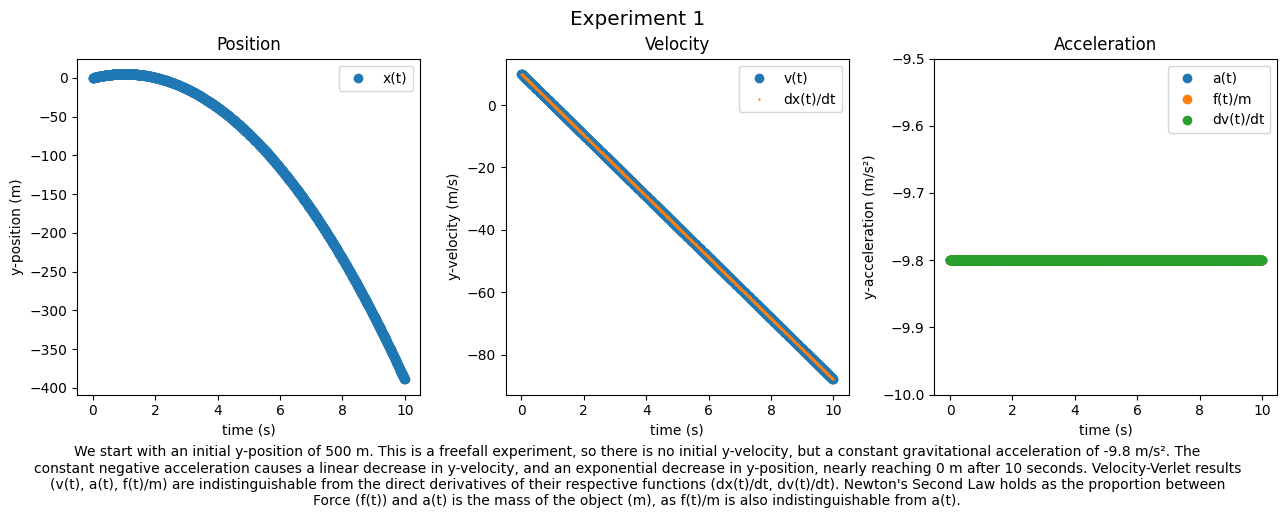

In [1968]:
m = 10
g = - 9.8
f_gravity      = zeros( (len(T), 3) ) ## initialize an empty (i.e. zero-filled) 'force-trajectory' array
f_gravity[:,1] = m * g ## fill-in all entries of axis-0, i.e. the x-axis, for all, hence ":" time-points
R_tx = zeros((len(T), 3)) ## initialize position-trajectory (position vectors for all times, i.e. len(T))
V_tx = zeros((len(T), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
A_tx = zeros((len(T), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

R_tx[0] = x0 ## initialize the 0th position-trajectory entry to the initial-position
V_tx[0] = v0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
A_tx[0] = f_gravity[0] / m ## initialize the 0th acceleration-trajectory entry according to Newton's 2nd Law
for t in range(1, len(T)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  R_tx[t] = R_tx[t-1] + V_tx[t-1] * dt + 0.5 * A_tx[t-1] * dt**2 ## Velocity-Verlet Step 1 : find new position from old data
  A_tx[t] = f_gravity[t-1] / m ## determine the t-th acceleration entry according to Newton's 2nd Law of the t-th force/mass
  V_tx[t] = V_tx[t-1] + 0.5 * ( A_tx[t-1] + A_tx[t] ) * dt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration

dRdt_tx = d(R_tx)/dt ## take numerical-time-derivative of the aforementioned position-trajectory
dVdt_tx = d(V_tx)/dt ## take numerical-time-derivative of the aforementioned velocity-trajectory

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.text(1, 1, "Experiment 1", ha='center', fontsize='x-large')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2, top=0.93, bottom=0.23)
caption = "We start with an initial y-position of 500 m. This is a freefall experiment, so there is no initial y-velocity,"\
            " but a constant gravitational acceleration of -9.8 m/s\u00b2. The constant negative acceleration causes a linear decrease in y-velocity,"\
            " and an exponential decrease in y-position, nearly reaching 0 m after 10 seconds. Velocity-Verlet results (v(t), a(t), f(t)/m) are indistinguishable"\
            " from the direct derivatives of their respective functions (dx(t)/dt, dv(t)/dt). Newton's Second Law holds as the proportion between Force (f(t))"\
            " and a(t) is the mass of the object (m), as f(t)/m is also indistinguishable from a(t)."
caption_wrapped = textwrap.fill(caption, width=175)
fig.text(1, 0, caption_wrapped, ha='center')

ax1.scatter(T, R_tx[:,1], label="x(t)")
ax1.set_title("Position")
ax1.legend(loc="upper right")
ax1.set(xlabel='time (s)', ylabel='y-position (m)')

ax2.scatter(T, V_tx[:,1], label="v(t)")
ax2.scatter(T, dRdt_tx[:,1], s=0.5, label="dx(t)/dt")
ax2.set_title("Velocity")
ax2.legend(loc="upper right")
ax2.set(xlabel='time (s)', ylabel='y-velocity (m/s)')

ax3.scatter(T, A_tx[:,1], label="a(t)")
ax3.scatter(T, f_gravity[:,1]/m, label="f(t)/m")
ax3.scatter(T, dVdt_tx[:,1], label="dv(t)/dt")
ax3.set_ylim(-10,-9.5)
ax3.legend(loc="upper right")
ax3.set_title("Acceleration")
ax3.set(xlabel='time (s)', ylabel='y-acceleration (m/s\u00b2)')

fig.show()

### <font color='Red'>  Next copy-n-paste the earlier VelocityVerlet algorthim but with a modification: </font>
```
a_t[t] = -np.dot( v_t[t], v_t[t]) / (np.linalg.norm(x_t[t])**2) * ( x_t[t] - np.zeros(3) )
```
### <font color='Red'> use this to our equations-of-motion, and obtain a trajectory and accelerations.</font>

### <font color='Red'> I.e. implement Velocity Verlet with the Centripetal acceleration. </font>

In [1969]:
r_t = np.zeros((len(T), 3)) ## initialize position-trajectory (position vectors for all times, i.e. len(T))
v_t = np.zeros((len(T), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
a_t = np.zeros((len(T), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

r_t[0] = x0 ## initialize the 0th position-trajectory entry to the initial-position
v_t[0] = v0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
a_t[0] = -np.dot( v_t[0], v_t[0]) / (np.linalg.norm(r_t[0])**2) * ( r_t[0] - np.zeros(3) )
for t in range(1, len(T)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  r_t[t] = r_t[t-1] + v_t[t-1] * dt + 0.5 * a_t[t-1] * dt**2 ## Velocity-Verlet Step 1 : find new position from old data
  a_t[t] = -np.dot( v_t[t-1], v_t[t-1]) / (np.linalg.norm(r_t[t-1])**2) * ( r_t[t-1] - np.zeros(3) )
  v_t[t] = v_t[t-1] + 0.5 * ( a_t[t-1] + a_t[t] ) * dt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration

####   <font color='Red'> Plot x(t), y(t), z(t) trajectories (in time) on 1 graph, be sure in include caption. Then Plot v_x(t), v_y(t), v_z(t) velocities (in time) on 1 graph, in conclusion explain this graph </font>

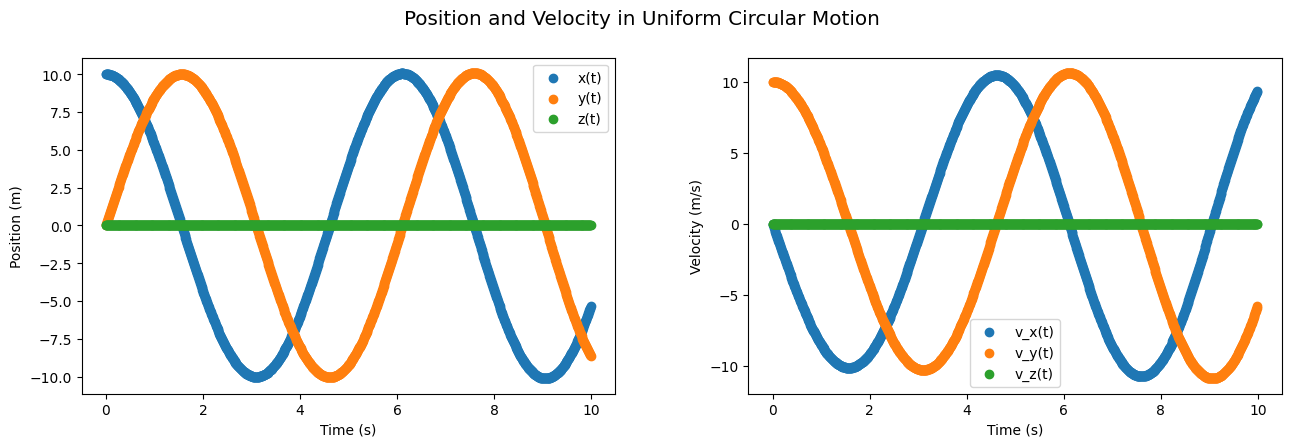

In [1970]:
fig, (plt1, plt2) = plt.subplots(1, 2)
fig.text(1, 1, "Position and Velocity in Uniform Circular Motion", ha='center', fontsize='x-large')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2, top=0.93, bottom=0.23)

plt1.scatter(T, r_t[:,0], label = "x(t)") ## 0-axis plot
plt1.scatter(T, r_t[:,1], label = "y(t)") ## 1-axis plot
plt1.scatter(T, r_t[:,2], label = "z(t)") ## 2-axis plot
plt1.set(xlabel='Time (s)', ylabel='Position (m)')
plt1.legend(loc="best")

plt2.scatter(T, v_t[:,0], label = "v_x(t)") ## 0-axis plot
plt2.scatter(T, v_t[:,1], label = "v_y(t)") ## 1-axis plot
plt2.scatter(T, v_t[:,2], label = "v_z(t)") ## 2-axis plot
plt2.set(xlabel='Time (s)', ylabel='Velocity (m/s)')
plt2.legend(loc="best")

fig.show()

The motion of this particle is completely within the x-y plane. It therefore never deviates from its initial z-displacement of 0 m and z-velocity of 0 m/s. We model its path with the velocity-verlet integrator, albeit with an expression for centripetal acceleration inserted with the usual kinematics. Given the circularity of its path, displacement and velocity in the x- and y-directions oscillate sinusoidally with time, returning periodically to their initial position at (10, 0, 0) m and initial velocity of (0, 10, 0) m/s. As the particle moves around the circle, x- and y-displacements and x- and y-velocities are necessarily offset by a 90 degree phase shift.

###   <font color='Red'> Plot a parametric plot with x and y </font>

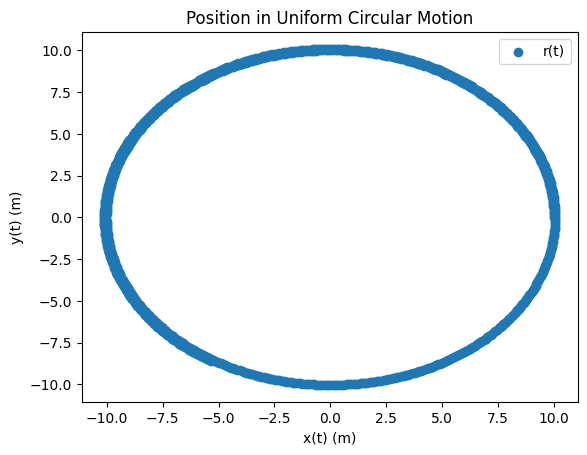

In [1971]:
plt.scatter(r_t[:,0], r_t[:,1], label = "r(t)") ## 0-axis plot
plt.title("Position in Uniform Circular Motion")
plt.xlabel("x(t) (m)")
plt.ylabel("y(t) (m)")
plt.legend(loc="best")
plt.show()

The centripetal acceleration causes the particle to trace out a circle in the x-y plane. R(0) = x(0) , which has the same magnitude as all r(t).

#   <font color='Red'> **Experiment 2**  </font>

### <font color='Red'>  Let's now implment the  *for-loop over object configurations*; by **varying the velocity**, keeping the objects mass and radius fixed. You may use the VelocityVerletRot method defined above. </font>



#### <font color='Red'> Specify a range of speeds, you'd like to test. And an empty array of what you'd like to measure, i.e. the force (of the same length of the array of speeds). </font>

In [1972]:
m = 5
radius = 10

speed = 10*(np.random.random(1000))
force = np.zeros(len(speed))

#### <font color='Red'> Setup a time-array like before to test the dynamics.  </font>

In [1973]:
dt = 0.01 ### s(detector)
t0 = 0
tf = 10
T = arange(t0, tf, dt)

#### <font color='Red'> Let's run the for-loop, over the velocities we wish to experiment over. </font>

In [1953]:
class Experiment:
    def __init__(self):
        pass

    def run(self):
        self.output = self.attribute

r = np.zeros((len(T), 3)) ## initialize position-trajectory (position vectors for all times, i.e. len(T))
v = np.zeros((len(T), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
a = np.zeros((len(T), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

for i in range(len(speed)):
  for t in range(1, len(T)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
    r[0] = np.array([radius, 0, 0]) ## initialize the 0th position-trajectory entry to the initial-position
    v[0] = np.array([0, speed[i], 0]) ## initialize the 0th velocity-trajectory entry to the initial-velocity
    a[0] = -np.dot( v[0], v[0]) / (np.linalg.norm(r[0])**2) * ( r[0] - np.zeros(3) )
    r[t] = r[t-1] + v[t-1] * dt + 0.5 * a[t-1] * dt**2 ## Velocity-Verlet Step 1 : find new position from old data
    a[t] = -np.dot( v[t-1], v[t-1]) / (np.linalg.norm(r[t-1])**2) * ( r[t-1] - np.zeros(3) )
    v[t] = v[t-1] + 0.5 * ( a[t-1] + a[t] ) * dt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration
    V = np.mean(np.linalg.norm(v[t]))

  experiment = Experiment()
  experiment.attribute = V
  experiment.run()
  force[i]=(m/radius)*(experiment.output)**2

#### <font color='Red'> Plot your data: F vs. v </font>

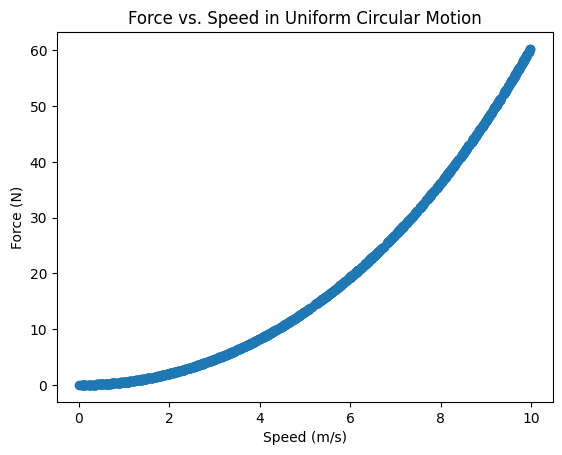

In [1954]:
plt.scatter(speed, force)
plt.title("Force vs. Speed in Uniform Circular Motion")
plt.ylabel("Force (N)")
plt.xlabel("Speed (m/s)")
plt.show()

The relationship between centripetal force and linear speed in uniform circular motion is well-known. This model iterating velocity-verlet equations for 1000 different random velocities between 0 and 10 m/s reflects the theoretical quadratic relationship. The variation from f = v^2 exactly is a multiplication by the ratio of a constant mass and a constant radius.

#### <font color='Red'> Solve Least-Squares Linear fit to the Data, i.e. obtain a linear form of your data (e.g. f ~ x). Get linear coefficients y = m * x + c, i.e. get m and c (with y = f, and x = v$^2$). And print the values of m and c with units. </font>

In [1955]:
def linearfit(x,y):
  A = np.vstack([x, np.ones(len(x))]).T
  return np.linalg.lstsq(A, y, rcond=None)[0]

lineararray = linearfit(speed**2, force)

print("For linear fit f = m*(v^2) + c, m = " + str(lineararray[0]) + " N/v^2 and c = " + str(lineararray[1]) + " N.")


For linear fit f = m*(v^2) + c, m = 0.5894685229699694 N/v^2 and c = -0.901896100329327 N.


### <font color='Red'> Get the theoritical slope ratio, e.g. m/R, and print it with units how does it compare with your linear fit? </font>

In [1956]:
print("Theoretical mass/R = " + str(m/radius) + " kg/m")
print("Experimental mass/R = " + str(lineararray[0]) + " kg/m")

percentdiff = sqrt(((m/radius)-lineararray[0])**2)/(m/radius)
print("Experimental percent difference from theoretical prediction = " + str(percentdiff*100) + "%")


Theoretical mass/R = 0.5 kg/m
Experimental mass/R = 0.5894685229699694 kg/m
Experimental percent difference from theoretical prediction = 17.89370459399389%


#### <font color='Red'> Let's plot this linear function (in F vs. v^2): data, simulation-fit, and theory-fit </font>

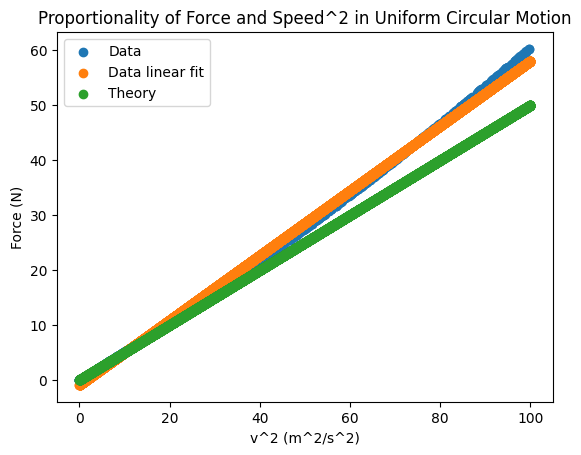

In [1957]:
x = arange(0, 100, dt)
plt.title("Proportionality of Force and Speed^2 in Uniform Circular Motion")
plt.scatter((speed**2), force, label = "Data")
plt.scatter(x, lineararray[0]*x + lineararray[1], label = "Data linear fit")
plt.scatter(x, (m/radius)*x, label = "Theory")
plt.xlabel("v^2 (m^2/s^2)")
plt.ylabel("Force (N)")
plt.legend(loc="best")
plt.show()

The quadratic relationship between linear speed and centripetal force explored in the previous graph translates to a linear relationship between force and the square of the speed. The slope of these lines represents the constant of proportionality between the two, which in this case theoretically is the ratio of the particle's mass to the magnitude of its radial displacement. The last lab had us consider error, and with that in mind, it is perhaps not surprising that the graphs created numerically (Data, which directly plots the simulated values, and Data linear fit, which linearizes the previous quadratic model) diverge non-trivially from the one analytically derived from Theory. The pure Data still seems to retain a little curvature, most likely arising from random overrepresentation in the speed data set or compounding inaccuracies from a non-infintesimal dt in the velocity-verlet integrator.

#   <font color='Red'> **Experiment 3** </font>

### <font color='Red'>  Let's now implment the *for-loop over object configurations*, but thiis time by **varying the Radius** of rotation, keeping the objects mass and velocity fixed. </font>

In [1958]:
mass = 10
vel = 2

rad = (((np.random.random(1000))*4)+1)
F = np.zeros(len(rad))

### <font color='Red'> Define the time array, indicating all moments of time considered </font>

In [1959]:
dt = 0.01 ### s(detector)
t0 = 0
tf = 10
T = arange(t0, tf, dt)

### <font color='Red'> For-loop over Radii considered </font>

In [1960]:
r = np.zeros((len(T), 3)) ## initialize position-trajectory (position vectors for all times, i.e. len(T))
v = np.zeros((len(T), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
a = np.zeros((len(T), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

for i in range(len(rad)):
  for t in range(1, len(T)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
    r[0] = np.array([rad[i], 0, 0]) ## initialize the 0th position-trajectory entry to the initial-position
    v[0] = np.array([0, vel, 0]) ## initialize the 0th velocity-trajectory entry to the initial-velocity
    a[0] = -np.dot( v[0], v[0]) / (np.linalg.norm(r[0])**2) * ( r[0] - np.zeros(3) )
    r[t] = r[t-1] + v[t-1] * dt + 0.5 * a[t-1] * dt**2 ## Velocity-Verlet Step 1 : find new position from old data
    a[t] = -np.dot( v[t-1], v[t-1]) / (np.linalg.norm(r[t-1])**2) * ( r[t-1] - np.zeros(3) )
    v[t] = v[t-1] + 0.5 * ( a[t-1] + a[t] ) * dt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration
    R = np.mean(np.linalg.norm(r[t]))

  exper = Experiment()
  exper.attribute = R
  exper.run()
  F[i]=(mass*vel**2)/(exper.output)

### <font color='Red'> Plot the Radii vs. Force graph </font>

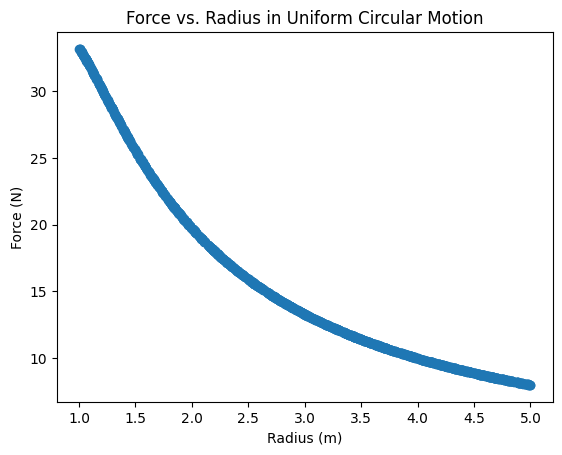

In [1961]:
plt.scatter(rad, F)
plt.title("Force vs. Radius in Uniform Circular Motion")
plt.xlabel("Radius (m)")
plt.ylabel("Force (N)")
plt.show()

The relationship between centripetal force and radius of curvature in uniform circular motion is well-known. This model iterating velocity-verlet equations for 1000 different random radii between 1.0 and 5.0 m reflects the theoretical inverse relationship. The variation from f = 1/r exactly is a multiplication by the product of constant mass and the square of constant linear speed.

### <font color='Red'> Solve Least-Squares Linear fit to the Data, i.e. obtain a linear form of your data (e.g. f(R) ~ x). Get linear coefficients y = m * x + c, i.e. get m and c (with y = f, and x = 1/R). And print the values of m and c with units. </font>

In [1962]:
def linearfit(x,y):
  A = np.vstack([x, np.ones(len(x))]).T
  return np.linalg.lstsq(A, y, rcond=None)[0]

lineararray = linearfit(1/rad, F)

print("For linear fit f = M*(1/R) + c, M = " + str(lineararray[0]) + " N*m and c = " + str(lineararray[1]) + " N.")

For linear fit f = M*(1/R) + c, M = 34.73779290610586 N*m and c = 1.6205626663942756 N.


### <font color='Red'> Get the theoritical slope ratio, e.g. m v^2, and print it with units how does it compare with your linear fit? </font>

In [1963]:
print("Theoretical mass*v^2 = " + str(mass*vel**2) + " kg*m^2/s^2")
print("Experimental mass*v^2 = " + str(lineararray[0]) + " kg*m^2/s^2")

percentdiff = sqrt(((mass*vel**2)-lineararray[0])**2)/(mass*vel**2)
print("Experimental percent difference from theoretical prediction = " + str(percentdiff*100) + "%")

Theoretical mass*v^2 = 40 kg*m^2/s^2
Experimental mass*v^2 = 34.73779290610586 kg*m^2/s^2
Experimental percent difference from theoretical prediction = 13.15551773473535%


#### <font color='Red'> Let's plot this linear function (in F vs. 1/R): data, simulation-fit, and theory-fit </font>

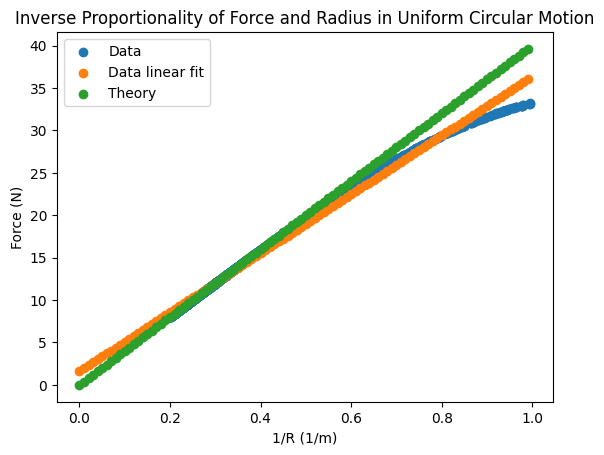

In [1964]:
x = arange(0, 1, dt)
plt.title("Inverse Proportionality of Force and Radius in Uniform Circular Motion")
plt.scatter((1/rad), F, label = "Data")
plt.scatter(x, lineararray[0]*x + lineararray[1], label = "Data linear fit")
plt.scatter(x, (mass*vel**2)*x, label = "Theory")
plt.xlabel("1/R (1/m)")
plt.ylabel("Force (N)")
plt.legend(loc="best")
plt.show()

The inverse relationship between linear speed and centripetal force explored in the previous graph translates to a linear relationship between force and the inverse of the radial displacement. The slope of these lines represents the constant of proportionality between the two, which in this case theoretically is the product of a constant mass and the square of a constant linear speed. The last lab had us consider error, and with that in mind, it is perhaps not surprising that the graphs created numerically (Data, which directly plots the simulated values, and Data linear fit, which linearizes the previous quadratic model) diverge non-trivially from the one analytically derived from Theory. The pure Data still seems to retain a little curvature, most likely arising from random overrepresentation in the radius data set or compounding inaccuracies from a non-infintesimal dt in the velocity-verlet integrator.

#   <font color='Red'> **Conclusion** </font>

### <font color='Red'> Explain all graphs, and relevant physics invovled in the simulations. Explain the need for a good integration time step $\Delta$t. </font>

Write your Conclusion here

### <font color='Red'> Why is it called Uniform Circular Motion if there is acceleration? </font>

### <font color='Red'> In Circular Motion, where is the Acceleration and Velocity vector pointing at any given time? </font>